# Intro Into Features
-----

## What are features?

According to Wiki, a feature is an individual measurable property or characteristic of a phenomenon. It is basically the datapoints we use as input to machine learning models. For instance the amount of a payment would be a feature in a payment fraud data-set.

Before we do any sort of modeling, we need to have an understanding of the features we will use as input and construct them in a way a neural net model can use them. Overall the idea of DeepLearning is that the data does not need to be featurized/pre-processed like we do in more traditional machine learning, however, one can not just point a Neural Net at a file and hope magic will happen, some minor transformations are needed.

This is what the `f3atur3s` and `eng1n3` packages do. The f3atures package defines the features, the eng1n3 package reads them from files for instance.

We will start off with some simple examples of Rank-0 and Rank-1 features, these are to most common in traditional machine learning. Each individual feature will be a scalar or a array in which you have the features as columns and multiple rows of data, that gives you something that looks like an excel spreadsheet, i.e a Rank-2, matrix-like, data-structure. Where the columns are various features and the lines are individual training/test samples. In our payment fraud example, the amount would be one column a specific payment would be one row.

## Requirements
Before running the experiment, make sure to import the `numpy`, `pandas` and `numba` packages in your virtual environment
```
> pip install numpy
> pip install pandas
> pip install numba
```
And that the notebook can find the `f3atur3s` and `eng1n3` packages.


## Preparation

Before creating features, we will have to import a couple of packages

In [1]:
import numpy as np
import pandas as pd
import math
import f3atur3s as ft
import eng1n3.pandas as en

And we define the **file** we will read from.

In [2]:
file = './data/intro_card.csv'

Let's have a look at the raw content of the file. It's just a very simple comma delimited file. The first row is a header column that specifies the names of the columns. This is what an excel export would look like. 

*(Following command line cells may only works on unix machines)*

In [3]:
!cat $file

Date,Amount,Card,Merchant,MCC,Country,Fraud
20200101,1.0,CARD-1,MRC-1,0001,DE,0
20200102,2.0,CARD-2,MRC-2,0002,GB,0
20200103,3.0,CARD-1,MRC-3,0003,DE,1
20200104,4.0,CARD-1,MRC-3,0003,FR,0
20200104,5.0,CARD-2,MRC-2,0002,GB,0
20200106,6.0,CARD-2,MRC-4,,DE,0

## Rank-0 and Rank-1
In the following set of examples we will build a set of features of Rank-0 and Rank-1 into a Pandas DataFrame. This means the features will be plain scalars or arrays. When we pack multiple of these into one structure we get a Rank-2 data structure, a sort of excel spreadsheet where the features are columns and the row are samples. 

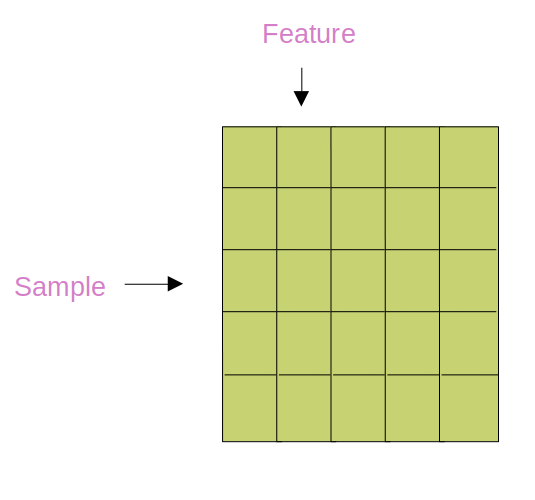

DataFrames can not directly be interpreted by a Neural Net Model, but it will be a small step to convert them into **Numpy** arrays which Neural Net model can almost readily use, that will be shown in the next notebooks. Moreover Pandas are a nice tool to do some analytics and get a good understanding of the data.


### FeatureSource
First let's build a couple of simple string features

In [4]:
card = ft.FeatureSource(
    'Card',                 # The name of the source feature, for source features this must match with the header 
    ft.FEATURE_TYPE_STRING  # The data type of the feature, in this case we intepret as a string
)

merchant = ft.FeatureSource('Merchant', ft.FEATURE_TYPE_STRING)

td = ft.TensorDefinition(
    'Features',             # Name for the TensorDefinition
    [card, merchant]        # A list of features to build
)

# Now ask the EnginePandas to make a Pandas DataFrame from the TensorDefinition
with en.EnginePandas(num_threads=1) as e:
    df = e.df_from_csv(
        td,                 # Our TensorDefinition with the 2 features in it.
        file,               # The file we want to read
        inference=False     # Inference is False, we assume we are building a training dataset.
    )

# Display the Pandas DataFrame
df

2023-03-21 10:30:45.529 eng1n3.common.engine           INFO     Start Engine...
2023-03-21 10:30:45.530 eng1n3.pandas.pandasengine     INFO     Pandas Version : 1.5.3
2023-03-21 10:30:45.531 eng1n3.pandas.pandasengine     INFO     Numpy Version : 1.23.5
2023-03-21 10:30:45.532 eng1n3.pandas.pandasengine     INFO     Building Panda for : Features from file ./data/intro_card.csv
2023-03-21 10:30:45.566 eng1n3.pandas.pandasengine     INFO     Reshaping DataFrame to: Features


,Card,Merchant
0,CARD-1,MRC-1
1,CARD-2,MRC-2
2,CARD-1,MRC-3
3,CARD-1,MRC-3
4,CARD-2,MRC-2
5,CARD-2,MRC-4


We can also read numerical features into floats

In [5]:
amount = ft.FeatureSource('Amount', ft.FEATURE_TYPE_FLOAT)

td = ft.TensorDefinition('Features', [card, merchant, amount])

with en.EnginePandas(num_threads=1) as e:
    df = e.df_from_csv(td, file, inference=False)
    
df

2023-03-21 10:30:47.487 eng1n3.common.engine           INFO     Start Engine...
2023-03-21 10:30:47.488 eng1n3.pandas.pandasengine     INFO     Pandas Version : 1.5.3
2023-03-21 10:30:47.488 eng1n3.pandas.pandasengine     INFO     Numpy Version : 1.23.5
2023-03-21 10:30:47.489 eng1n3.pandas.pandasengine     INFO     Building Panda for : Features from file ./data/intro_card.csv
2023-03-21 10:30:47.492 eng1n3.pandas.pandasengine     INFO     Reshaping DataFrame to: Features


,Card,Merchant,Amount
0,CARD-1,MRC-1,1.0
1,CARD-2,MRC-2,2.0
2,CARD-1,MRC-3,3.0
3,CARD-1,MRC-3,4.0
4,CARD-2,MRC-2,5.0
5,CARD-2,MRC-4,6.0


And validate that the type is indeed different

In [6]:
df.dtypes

Card         object
Merchant     object
Amount      float64
dtype: object

#### Dates 
In order to read the dates, we need to provide a format_code that explains how to interpret the raw string and form a date from it.

These are the standard Python format codes, more info in the standard documentation. https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior

In [7]:
date = ft.FeatureSource('Date', ft.FEATURE_TYPE_DATE, format_code='%Y%m%d')

td = ft.TensorDefinition('Features', [date, card, merchant, amount])

with en.EnginePandas(num_threads=1) as e:
    df = e.df_from_csv(td, file, inference=False)
    
df

2023-03-21 10:30:50.382 eng1n3.common.engine           INFO     Start Engine...
2023-03-21 10:30:50.383 eng1n3.pandas.pandasengine     INFO     Pandas Version : 1.5.3
2023-03-21 10:30:50.384 eng1n3.pandas.pandasengine     INFO     Numpy Version : 1.23.5
2023-03-21 10:30:50.384 eng1n3.pandas.pandasengine     INFO     Building Panda for : Features from file ./data/intro_card.csv
2023-03-21 10:30:50.389 eng1n3.pandas.pandasengine     INFO     Reshaping DataFrame to: Features


,Date,Card,Merchant,Amount
0,2020-01-01,CARD-1,MRC-1,1.0
1,2020-01-02,CARD-2,MRC-2,2.0
2,2020-01-03,CARD-1,MRC-3,3.0
3,2020-01-04,CARD-1,MRC-3,4.0
4,2020-01-04,CARD-2,MRC-2,5.0
5,2020-01-06,CARD-2,MRC-4,6.0


And validate we did indeed get a datetime field

In [8]:
df.dtypes

Date        datetime64[ns]
Card                object
Merchant            object
Amount             float64
dtype: object

#### Categorical features
And finally let's interpret the merchant code and country as categorical features. Pandas has an efficient way of storing them. If you have a string feature with relatively low cardinality, it's best to read it as categorical

In [9]:
# Note this feature has a default, the mcc value for the 5th row is empty. We don't want empty values.
mcc = ft.FeatureSource('MCC', ft.FEATURE_TYPE_CATEGORICAL, default='0000')
country = ft.FeatureSource('Country', ft.FEATURE_TYPE_CATEGORICAL)

td = ft.TensorDefinition('Features', [date, card, merchant, amount, mcc, country])

with en.EnginePandas(num_threads=1) as e:
    df = e.df_from_csv(td, file, inference=False)
    
df

2023-03-21 10:30:53.440 eng1n3.common.engine           INFO     Start Engine...
2023-03-21 10:30:53.441 eng1n3.pandas.pandasengine     INFO     Pandas Version : 1.5.3
2023-03-21 10:30:53.442 eng1n3.pandas.pandasengine     INFO     Numpy Version : 1.23.5
2023-03-21 10:30:53.442 eng1n3.pandas.pandasengine     INFO     Building Panda for : Features from file ./data/intro_card.csv
2023-03-21 10:30:53.448 eng1n3.pandas.pandasengine     INFO     Reshaping DataFrame to: Features


,Date,Card,Merchant,Amount,MCC,Country
0,2020-01-01,CARD-1,MRC-1,1.0,0001,DE
1,2020-01-02,CARD-2,MRC-2,2.0,0002,GB
2,2020-01-03,CARD-1,MRC-3,3.0,0003,DE
3,2020-01-04,CARD-1,MRC-3,4.0,0003,FR
4,2020-01-04,CARD-2,MRC-2,5.0,0002,GB
5,2020-01-06,CARD-2,MRC-4,6.0,0000,DE


In [10]:
df.dtypes

Date        datetime64[ns]
Card                object
Merchant            object
Amount             float64
MCC               category
Country           category
dtype: object

### FeatureOneHot
Neural Nets want numerical input, they can not directly use string or categorical values. So we'll need to transform features such as the 'Country' and 'MCC' into a number before we can use them. One way of doing this is through one-hot encoding.

A One Hot transformation will create a new column for each unique value of the original *base* feature. Those columns only contain 0 or 1. The value is 1 if the row of the base feature contained the respective value.

For instance country has 3 unique values. 'DE', 'FR' and 'GB'. A One Hot encoding will create 3 columns, `Country__DE`, `Country__FR` and `Country_GB`. For row one the original value was 'DE', so the column `Country__DE` will be 1, the other columns 0.

In [11]:
card = ft.FeatureSource('Card', ft.FEATURE_TYPE_STRING)
merchant = ft.FeatureSource('Merchant', ft.FEATURE_TYPE_STRING)
amount = ft.FeatureSource('Amount', ft.FEATURE_TYPE_FLOAT)
date = ft.FeatureSource('Date', ft.FEATURE_TYPE_DATE, format_code='%Y%m%d')
mcc = ft.FeatureSource('MCC', ft.FEATURE_TYPE_CATEGORICAL, default='0000')
country = ft.FeatureSource('Country', ft.FEATURE_TYPE_CATEGORICAL)

# Define 2 OneHot Features
mcc_oh = ft.FeatureOneHot(
    'MCC_OH',               # Name of the feature
    ft.FEATURE_TYPE_INT_8,  # Data type of the feature, in this case a small Int. Must be INT for OneHot Features
    mcc                     # The base feature, i.e. the feature to be converted into a one-hot encoding.
)
country_oh = ft.FeatureOneHot('Country_OH', ft.FEATURE_TYPE_INT_8, country)

td = ft.TensorDefinition('Features', [date, card, merchant, amount, mcc_oh, country_oh])

with en.EnginePandas(num_threads=1) as e:
    df = e.df_from_csv(td, file, inference=False)

df

2023-03-21 10:30:57.292 eng1n3.common.engine           INFO     Start Engine...
2023-03-21 10:30:57.293 eng1n3.pandas.pandasengine     INFO     Pandas Version : 1.5.3
2023-03-21 10:30:57.293 eng1n3.pandas.pandasengine     INFO     Numpy Version : 1.23.5
2023-03-21 10:30:57.294 eng1n3.pandas.pandasengine     INFO     Building Panda for : Features from file ./data/intro_card.csv
2023-03-21 10:30:57.302 eng1n3.pandas.pandasengine     INFO     Reshaping DataFrame to: Features


,Date,Card,Merchant,Amount,MCC__0001,MCC__0002,MCC__0003,MCC__0000,Country__DE,Country__FR,Country__GB
0,2020-01-01,CARD-1,MRC-1,1.0,1,0,0,0,1,0,0
1,2020-01-02,CARD-2,MRC-2,2.0,0,1,0,0,0,0,1
2,2020-01-03,CARD-1,MRC-3,3.0,0,0,1,0,1,0,0
3,2020-01-04,CARD-1,MRC-3,4.0,0,0,1,0,0,1,0
4,2020-01-04,CARD-2,MRC-2,5.0,0,1,0,0,0,0,1
5,2020-01-06,CARD-2,MRC-4,6.0,0,0,0,1,1,0,0


We now have more numbers for a model to work with

In [12]:
df.dtypes

Date           datetime64[ns]
Card                   object
Merchant               object
Amount                float64
MCC__0001               uint8
MCC__0002               uint8
MCC__0003               uint8
MCC__0000               uint8
Country__DE             uint8
Country__FR             uint8
Country__GB             uint8
dtype: object

### FeatureIndex
Another way to convert a string or categorical feature into a number is applying an indexing transformation. Indexing convert the value of the original *base* feature by assigning a unique integer number (key) to each string value.

A FeatureIndex will keep a dictionary of unique values. For instance for Country we have 3 unique values  'DE', 'FR' and 'GB'. The FeatureIndex will create a new feature with the mapped key 'DE'->1, 'FR'->2 and 'GB'->3.

In [13]:
card = ft.FeatureSource('Card', ft.FEATURE_TYPE_STRING)
merchant = ft.FeatureSource('Merchant', ft.FEATURE_TYPE_STRING)
amount = ft.FeatureSource('Amount', ft.FEATURE_TYPE_FLOAT)
date = ft.FeatureSource('Date', ft.FEATURE_TYPE_DATE, format_code='%Y%m%d')
mcc = ft.FeatureSource('MCC', ft.FEATURE_TYPE_CATEGORICAL, default='0000')
country = ft.FeatureSource('Country', ft.FEATURE_TYPE_CATEGORICAL)

# Define 2 Index Features
mcc_i = ft.FeatureIndex(
    'MCC_Index',             # Name of the feature
    ft.FEATURE_TYPE_INT_16,  # Data type of the feature, in this case a small Int. Must be INT for Index Features
    mcc                      # The base feature, i.e. the feature to be converted into an index
)
country_i = ft.FeatureIndex('Country_Index', ft.FEATURE_TYPE_INT_16, country)

td = ft.TensorDefinition('Features', [date, card, merchant, amount, mcc_i, country_i])

with en.EnginePandas(num_threads=1) as e:
    df = e.df_from_csv(td, file, inference=False)

df

2023-03-21 10:31:00.498 eng1n3.common.engine           INFO     Start Engine...
2023-03-21 10:31:00.500 eng1n3.pandas.pandasengine     INFO     Pandas Version : 1.5.3
2023-03-21 10:31:00.500 eng1n3.pandas.pandasengine     INFO     Numpy Version : 1.23.5
2023-03-21 10:31:00.501 eng1n3.pandas.pandasengine     INFO     Building Panda for : Features from file ./data/intro_card.csv
2023-03-21 10:31:00.511 eng1n3.pandas.pandasengine     INFO     Reshaping DataFrame to: Features


,Date,Card,Merchant,Amount,MCC_Index,Country_Index
0,2020-01-01,CARD-1,MRC-1,1.0,1,1
1,2020-01-02,CARD-2,MRC-2,2.0,2,2
2,2020-01-03,CARD-1,MRC-3,3.0,3,1
3,2020-01-04,CARD-1,MRC-3,4.0,3,3
4,2020-01-04,CARD-2,MRC-2,5.0,2,2
5,2020-01-06,CARD-2,MRC-4,6.0,4,1


In [14]:
df.dtypes

Date             datetime64[ns]
Card                     object
Merchant                 object
Amount                  float64
MCC_Index                 int16
Country_Index             int16
dtype: object

We can have a look at the dictionary, the feature now knows about the values it encoutered

In [15]:
country_i.dictionary

{'DE': 1, 'GB': 2, 'FR': 3}

### FeatureBin
In some case we may want to convert a float number into a integer, something that can be used as a 'categorical' learning type feature. (For instance in order to use it in an embedding). We can use a binning feature to achieve this. Binning will divide the total range of values in the base feature (the feature to bin) into equal parts, for instance numbers 0 to 10 are bin 0, numbers 10 to 20 is bin 1 etc.... 

In [16]:
card = ft.FeatureSource('Card', ft.FEATURE_TYPE_STRING)
merchant = ft.FeatureSource('Merchant', ft.FEATURE_TYPE_STRING)
amount = ft.FeatureSource('Amount', ft.FEATURE_TYPE_FLOAT)
date = ft.FeatureSource('Date', ft.FEATURE_TYPE_DATE, format_code='%Y%m%d')
mcc = ft.FeatureSource('MCC', ft.FEATURE_TYPE_CATEGORICAL, default='0000')
country = ft.FeatureSource('Country', ft.FEATURE_TYPE_CATEGORICAL)

# Define FeatureBin
amount_b = ft.FeatureBin(
    'Binned_Amount',         # Name of the feature
    ft.FEATURE_TYPE_INT_16,  # Data type of the feature, in this case a small Int. Must be INT for Bin Features
    amount,                  # The base feature, i.e. the feature to be converted into be binned
    3                        # Specify the number of bins we want
)

td = ft.TensorDefinition('Features', [date, card, merchant, amount, amount_b, mcc, country])

with en.EnginePandas(num_threads=1) as e:
    df = e.df_from_csv(td, file, inference=False)

df

2023-03-21 10:31:06.226 eng1n3.common.engine           INFO     Start Engine...
2023-03-21 10:31:06.227 eng1n3.pandas.pandasengine     INFO     Pandas Version : 1.5.3
2023-03-21 10:31:06.228 eng1n3.pandas.pandasengine     INFO     Numpy Version : 1.23.5
2023-03-21 10:31:06.228 eng1n3.pandas.pandasengine     INFO     Building Panda for : Features from file ./data/intro_card.csv
2023-03-21 10:31:06.237 eng1n3.pandas.pandasengine     INFO     Reshaping DataFrame to: Features


,Date,Card,Merchant,Amount,Binned_Amount,MCC,Country
0,2020-01-01,CARD-1,MRC-1,1.0,0,0001,DE
1,2020-01-02,CARD-2,MRC-2,2.0,1,0002,GB
2,2020-01-03,CARD-1,MRC-3,3.0,1,0003,DE
3,2020-01-04,CARD-1,MRC-3,4.0,2,0003,FR
4,2020-01-04,CARD-2,MRC-2,5.0,2,0002,GB
5,2020-01-06,CARD-2,MRC-4,6.0,2,0000,DE


The `Binned_Amount` feature is of type 'category', for optimal storage in the dataframe

In [17]:
df.dtypes

Date             datetime64[ns]
Card                     object
Merchant                 object
Amount                  float64
Binned_Amount          category
MCC                    category
Country                category
dtype: object

And we can ask the feature which bins it was using. It will report the maximum value for each bin. In this case
- Anything <= 1, is bin `0`
- Anything > 1 and <= 3.5 is bin `1`
- Anything > 3.5 <= postive max float value is bin `2`

In [18]:
amount_b.bins

[1.0, 3.5, 1.7976931348623157e+308]

### FeatureConcat
It is also possible to concatenate two string features into a new feature. For instance concatenate the card and merchant features. We will see later on that this can be useful for tracking behaviours of a specific card/merchant combinations.

In [19]:
card = ft.FeatureSource('Card', ft.FEATURE_TYPE_STRING)
merchant = ft.FeatureSource('Merchant', ft.FEATURE_TYPE_STRING)
amount = ft.FeatureSource('Amount', ft.FEATURE_TYPE_FLOAT)
date = ft.FeatureSource('Date', ft.FEATURE_TYPE_DATE, format_code='%Y%m%d')
mcc = ft.FeatureSource('MCC', ft.FEATURE_TYPE_CATEGORICAL, default='0000')
country = ft.FeatureSource('Country', ft.FEATURE_TYPE_CATEGORICAL)

# Define FeatureConcat
card_merchant = ft.FeatureConcat(
    'Card_Merchant',         # Name of the feature
    ft.FEATURE_TYPE_STRING,  # Data type of the feature, in this case a STRING. We can only concat strings.
    card,                    # The base feature, i.e. the first feature in the concat operation.
    merchant                 # The concat feature, i.e the second feature in the concat operations
)

td = ft.TensorDefinition('Features', [date, card, merchant, card_merchant, amount, mcc, country])

with en.EnginePandas(num_threads=1) as e:
    df = e.df_from_csv(td, file, inference=False)

df

2023-03-21 10:31:11.177 eng1n3.common.engine           INFO     Start Engine...
2023-03-21 10:31:11.178 eng1n3.pandas.pandasengine     INFO     Pandas Version : 1.5.3
2023-03-21 10:31:11.178 eng1n3.pandas.pandasengine     INFO     Numpy Version : 1.23.5
2023-03-21 10:31:11.179 eng1n3.pandas.pandasengine     INFO     Building Panda for : Features from file ./data/intro_card.csv
2023-03-21 10:31:11.185 eng1n3.pandas.pandasengine     INFO     Reshaping DataFrame to: Features


,Date,Card,Merchant,Card_Merchant,Amount,MCC,Country
0,2020-01-01,CARD-1,MRC-1,CARD-1MRC-1,1.0,0001,DE
1,2020-01-02,CARD-2,MRC-2,CARD-2MRC-2,2.0,0002,GB
2,2020-01-03,CARD-1,MRC-3,CARD-1MRC-3,3.0,0003,DE
3,2020-01-04,CARD-1,MRC-3,CARD-1MRC-3,4.0,0003,FR
4,2020-01-04,CARD-2,MRC-2,CARD-2MRC-2,5.0,0002,GB
5,2020-01-06,CARD-2,MRC-4,CARD-2MRC-4,6.0,0000,DE


In [20]:
df.dtypes

Date             datetime64[ns]
Card                     object
Merchant                 object
Card_Merchant            object
Amount                  float64
MCC                    category
Country                category
dtype: object

### FeatureExpression
Eventhough there are multiple types of Features, each applying some form of transformation logic, in some instance we may want to create a feature as a custom function of some other features. That is where the FeatureExpression comes in handy. It allows us to define a feature as that takes a function and a list of parameters as input. The function will be executed on each row and output as a new feature.

Please note that executing a function, may **not be as efficient** as doing true vectorized operations on the rows.

In [21]:
# Create a small Python function that doubles an input amount. 
# Note: The function must be available in the ROOT context of the engine!
def double_fn(x: float) -> float:
    return x * 2

card = ft.FeatureSource('Card', ft.FEATURE_TYPE_STRING)
merchant = ft.FeatureSource('Merchant', ft.FEATURE_TYPE_STRING)
amount = ft.FeatureSource('Amount', ft.FEATURE_TYPE_FLOAT)
date = ft.FeatureSource('Date', ft.FEATURE_TYPE_DATE, format_code='%Y%m%d')
mcc = ft.FeatureSource('MCC', ft.FEATURE_TYPE_CATEGORICAL, default='0000')
country = ft.FeatureSource('Country', ft.FEATURE_TYPE_CATEGORICAL)

# Define FeatureExpression
double_amount = ft.FeatureExpression(
    'Double_Amount',         # Name of the feature
    ft.FEATURE_TYPE_FLOAT,   # Data type of the feature, in this case a Float, the output of 'double_fn' is a float 
    double_fn,               # The expression we want to evaluate. Our 'double' function
    [amount]                 # The parameter features as list, in this case we only have one input, the 'x' value
)

td = ft.TensorDefinition('Features', [date, card, merchant, amount, double_amount, mcc, country])

with en.EnginePandas(num_threads=1) as e:
    df = e.df_from_csv(td, file, inference=False)

df


2023-03-21 10:31:14.503 eng1n3.common.engine           INFO     Start Engine...
2023-03-21 10:31:14.504 eng1n3.pandas.pandasengine     INFO     Pandas Version : 1.5.3
2023-03-21 10:31:14.505 eng1n3.pandas.pandasengine     INFO     Numpy Version : 1.23.5
2023-03-21 10:31:14.505 eng1n3.pandas.pandasengine     INFO     Building Panda for : Features from file ./data/intro_card.csv
2023-03-21 10:31:14.513 eng1n3.pandas.pandasengine     INFO     Reshaping DataFrame to: Features


,Date,Card,Merchant,Amount,Double_Amount,MCC,Country
0,2020-01-01,CARD-1,MRC-1,1.0,2.0,0001,DE
1,2020-01-02,CARD-2,MRC-2,2.0,4.0,0002,GB
2,2020-01-03,CARD-1,MRC-3,3.0,6.0,0003,DE
3,2020-01-04,CARD-1,MRC-3,4.0,8.0,0003,FR
4,2020-01-04,CARD-2,MRC-2,5.0,10.0,0002,GB
5,2020-01-06,CARD-2,MRC-4,6.0,12.0,0000,DE


### FeatureRatio
As the name suggests the FeatureRatio creates a new feature by dividing a base_feature by a denominator feature. This is generally faster than using a FeatureExpression like shown earlier. And it has some 0 division protection.

In [22]:
def double(x: float) -> float:
    return x * 2

card = ft.FeatureSource('Card', ft.FEATURE_TYPE_STRING)
merchant = ft.FeatureSource('Merchant', ft.FEATURE_TYPE_STRING)
amount = ft.FeatureSource('Amount', ft.FEATURE_TYPE_FLOAT)
date = ft.FeatureSource('Date', ft.FEATURE_TYPE_DATE, format_code='%Y%m%d')
mcc = ft.FeatureSource('MCC', ft.FEATURE_TYPE_CATEGORICAL, default='0000')
country = ft.FeatureSource('Country', ft.FEATURE_TYPE_CATEGORICAL)
double_amount = ft.FeatureExpression('Double_Amount', ft.FEATURE_TYPE_FLOAT, double, [amount])

# Define FeatureRatio
two = ft.FeatureRatio(
    'Two',                   # Name of the feature
    ft.FEATURE_TYPE_FLOAT_32,# Data type of the feature, in this case a Float, as the output of 'double' is a float 
    double_amount,           # The enumerator of our division, the ouput of the double function
    amount                   # The denominator of our division, the original amount
)

td = ft.TensorDefinition('Features', [date, card, merchant, amount, double_amount, two, mcc, country])

with en.EnginePandas(num_threads=1) as e:
    df = e.df_from_csv(td, file, inference=False)

df

2023-03-21 10:31:17.107 eng1n3.common.engine           INFO     Start Engine...
2023-03-21 10:31:17.108 eng1n3.pandas.pandasengine     INFO     Pandas Version : 1.5.3
2023-03-21 10:31:17.108 eng1n3.pandas.pandasengine     INFO     Numpy Version : 1.23.5
2023-03-21 10:31:17.108 eng1n3.pandas.pandasengine     INFO     Building Panda for : Features from file ./data/intro_card.csv
2023-03-21 10:31:17.113 eng1n3.pandas.pandasengine     INFO     Reshaping DataFrame to: Features


,Date,Card,Merchant,Amount,Double_Amount,Two,MCC,Country
0,2020-01-01,CARD-1,MRC-1,1.0,2.0,2.0,0001,DE
1,2020-01-02,CARD-2,MRC-2,2.0,4.0,2.0,0002,GB
2,2020-01-03,CARD-1,MRC-3,3.0,6.0,2.0,0003,DE
3,2020-01-04,CARD-1,MRC-3,4.0,8.0,2.0,0003,FR
4,2020-01-04,CARD-2,MRC-2,5.0,10.0,2.0,0002,GB
5,2020-01-06,CARD-2,MRC-4,6.0,12.0,2.0,0000,DE


For illustration purposes the data-type of the ratio feature was set to `float32 `. Whereas the original amount were `float64`, don't do this in a project, it can lead to overflow problems!

In [23]:
df.dtypes

Date             datetime64[ns]
Card                     object
Merchant                 object
Amount                  float64
Double_Amount           float64
Two                     float32
MCC                    category
Country                category
dtype: object

### FeatureNormalizeScale
In our little test dataset the amounts are not big at all, in real life datasets one will clearly encounter larger numbers, which a much broader standard deviation.

Though it is not possible to train Neural Nets on large numbers, it is generally **strongly advised not to do so**. Neural Nets tend to learn much better if the numbers are around 0. You should always normalize amount style features before training models.

One way to Normalize is to reduce the feature to a range between 0 and 1 by subtracting the minimum value and dividing by the difference between the maximum and minimum value. This is often referred to as 'Scaling'

$x_{scaled} = \frac{x - x_{min}} {x_{max} - x_{min}}\$

In [24]:
card = ft.FeatureSource('Card', ft.FEATURE_TYPE_STRING)
merchant = ft.FeatureSource('Merchant', ft.FEATURE_TYPE_STRING)
amount = ft.FeatureSource('Amount', ft.FEATURE_TYPE_FLOAT)
date = ft.FeatureSource('Date', ft.FEATURE_TYPE_DATE, format_code='%Y%m%d')
mcc = ft.FeatureSource('MCC', ft.FEATURE_TYPE_CATEGORICAL, default='0000')
country = ft.FeatureSource('Country', ft.FEATURE_TYPE_CATEGORICAL)

# Define NormalizerScale
scale = ft.FeatureNormalizeScale(
    'Scaled_Amount',         # Name of the feature
    ft.FEATURE_TYPE_FLOAT,   # Data type of the feature, in this case a Float, as the output of 'double' is a float 
    amount                   # The base feature we want to scale. Here we are scaling the amount
)

td = ft.TensorDefinition('Features', [date, card, merchant, amount, scale, mcc, country])

with en.EnginePandas(num_threads=1) as e:
    df = e.df_from_csv(td, file, inference=False)

df

2023-03-21 10:31:20.357 eng1n3.common.engine           INFO     Start Engine...
2023-03-21 10:31:20.358 eng1n3.pandas.pandasengine     INFO     Pandas Version : 1.5.3
2023-03-21 10:31:20.359 eng1n3.pandas.pandasengine     INFO     Numpy Version : 1.23.5
2023-03-21 10:31:20.360 eng1n3.pandas.pandasengine     INFO     Building Panda for : Features from file ./data/intro_card.csv
2023-03-21 10:31:20.364 e...renormalizescaleprocessor  INFO     Create Scaled_Amount Scale Amount. Min. 1.00 Max. 6.00
2023-03-21 10:31:20.365 eng1n3.pandas.pandasengine     INFO     Reshaping DataFrame to: Features


,Date,Card,Merchant,Amount,Scaled_Amount,MCC,Country
0,2020-01-01,CARD-1,MRC-1,1.0,0.0,0001,DE
1,2020-01-02,CARD-2,MRC-2,2.0,0.2,0002,GB
2,2020-01-03,CARD-1,MRC-3,3.0,0.4,0003,DE
3,2020-01-04,CARD-1,MRC-3,4.0,0.6,0003,FR
4,2020-01-04,CARD-2,MRC-2,5.0,0.8,0002,GB
5,2020-01-06,CARD-2,MRC-4,6.0,1.0,0000,DE


We can ask the feature which min and max it used.

In [25]:
scale.minimum, scale.maximum

(1.0, 6.0)

In [26]:
# We can see how the instances have been converted
(df['Amount']-1)/(scale.maximum - scale.minimum)

0    0.0
1    0.2
2    0.4
3    0.6
4    0.8
5    1.0
Name: Amount, dtype: float64

This scaler works best if the distribution is **not** Gaussian (This tends to be the case for raw amount in payments, they tend to have log-normal-ish distribution).

But it does not like the standard deviation to be too big and it's sensitive to outliers. 

### FeatureNormalizeStandard
Another way of Normalizing a feature is standardization. Here we assume the data is normally distribtuted, the data is transformed so that is it centered around 0 with a standard deviation of 1. It is achieved by subtracting the mean from each value and dividing by the standard deviation.

$x_{standard} = \frac{x - \mu} {\sigma}\$

In [27]:
card = ft.FeatureSource('Card', ft.FEATURE_TYPE_STRING)
merchant = ft.FeatureSource('Merchant', ft.FEATURE_TYPE_STRING)
amount = ft.FeatureSource('Amount', ft.FEATURE_TYPE_FLOAT)
date = ft.FeatureSource('Date', ft.FEATURE_TYPE_DATE, format_code='%Y%m%d')
mcc = ft.FeatureSource('MCC', ft.FEATURE_TYPE_CATEGORICAL, default='0000')
country = ft.FeatureSource('Country', ft.FEATURE_TYPE_CATEGORICAL)

# Define NormalizerScale
standard = ft.FeatureNormalizeStandard(
    'Standard_Amount',       # Name of the feature
    ft.FEATURE_TYPE_FLOAT,   # Data type of the feature, in this case a Float. 
    amount                   # The base feature we want to standardize. Here we are standardizing the amount
)

td = ft.TensorDefinition('Features', [date, card, merchant, amount, standard, mcc, country])

with en.EnginePandas(num_threads=1) as e:
    df = e.df_from_csv(td, file, inference=False)

df

2023-03-21 10:31:31.503 eng1n3.common.engine           INFO     Start Engine...
2023-03-21 10:31:31.504 eng1n3.pandas.pandasengine     INFO     Pandas Version : 1.5.3
2023-03-21 10:31:31.504 eng1n3.pandas.pandasengine     INFO     Numpy Version : 1.23.5
2023-03-21 10:31:31.504 eng1n3.pandas.pandasengine     INFO     Building Panda for : Features from file ./data/intro_card.csv
2023-03-21 10:31:31.508 e...ormalizestandardprocessor  INFO     Create Standard_Amount Standard Amount feature. Mean 3.50 Std 1.87
2023-03-21 10:31:31.509 eng1n3.pandas.pandasengine     INFO     Reshaping DataFrame to: Features


,Date,Card,Merchant,Amount,Standard_Amount,MCC,Country
0,2020-01-01,CARD-1,MRC-1,1.0,-1.336306,0001,DE
1,2020-01-02,CARD-2,MRC-2,2.0,-0.801784,0002,GB
2,2020-01-03,CARD-1,MRC-3,3.0,-0.267261,0003,DE
3,2020-01-04,CARD-1,MRC-3,4.0,0.267261,0003,FR
4,2020-01-04,CARD-2,MRC-2,5.0,0.801784,0002,GB
5,2020-01-06,CARD-2,MRC-4,6.0,1.336306,0000,DE


The feature can tell us which mean and standard deviation it used

In [28]:
standard.mean,standard.stddev

(3.5, 1.8708286933869707)

In [29]:
# The value are calculated as;
(df['Amount']-standard.mean)/standard.stddev

0   -1.336306
1   -0.801784
2   -0.267261
3    0.267261
4    0.801784
5    1.336306
Name: Amount, dtype: float64

As mentioned amounts in payments are typically not normally distributed, one trick we can apply is taking the $log_{base}$ first. That tends to make the distribution more normal.

In [30]:
# Define NormalizerStandard
standard_log = ft.FeatureNormalizeStandard(
    'Standard_Amount',       # Name of the feature
    ft.FEATURE_TYPE_FLOAT,   # Data type of the feature, in this case a Float.
    amount,                  # The base feature we want to standardize. Here we are standardizing the amount
    'e'                      # Define the log-base, each value will now be log transformed first
)

td = ft.TensorDefinition('Features', [date, card, merchant, amount, standard_log, mcc, country])

with en.EnginePandas(num_threads=1) as e:
    df = e.df_from_csv(td, file, inference=False)

df

2023-03-21 10:31:36.981 eng1n3.common.engine           INFO     Start Engine...
2023-03-21 10:31:36.982 eng1n3.pandas.pandasengine     INFO     Pandas Version : 1.5.3
2023-03-21 10:31:36.983 eng1n3.pandas.pandasengine     INFO     Numpy Version : 1.23.5
2023-03-21 10:31:36.983 eng1n3.pandas.pandasengine     INFO     Building Panda for : Features from file ./data/intro_card.csv
2023-03-21 10:31:36.988 e...ormalizestandardprocessor  INFO     Create Standard_Amount Standard Amount feature. Mean 1.10 Std 0.66
2023-03-21 10:31:36.989 eng1n3.pandas.pandasengine     INFO     Reshaping DataFrame to: Features


,Date,Card,Merchant,Amount,Standard_Amount,MCC,Country
0,2020-01-01,CARD-1,MRC-1,1.0,-1.653464,0001,DE
1,2020-01-02,CARD-2,MRC-2,2.0,-0.610164,0002,GB
2,2020-01-03,CARD-1,MRC-3,3.0,0.002012,0003,DE
3,2020-01-04,CARD-1,MRC-3,4.0,0.436884,0003,FR
4,2020-01-04,CARD-2,MRC-2,5.0,0.774417,0002,GB
5,2020-01-06,CARD-2,MRC-4,6.0,1.050315,0000,DE


The mean and standard dev are now calculated on the 'log' values.

In [31]:
standard_log.mean,standard_log.stddev

(1.1006128394412176, 0.6596226878292422)

We can double check this. **Note how we add a really small value to each x to avoid having infinity values** (The log of zero is undefined)

In [32]:
(np.log(df['Amount']+standard_log.delta)).mean(),(np.log(df['Amount']+standard_log.delta)).std(),standard_log.delta

(1.1006128394412176, 0.6596226878292422, 0.01)

In [33]:
(np.log(df['Amount']+standard_log.delta)-standard_log.mean)/standard_log.stddev

0   -1.653464
1   -0.610164
2    0.002012
3    0.436884
4    0.774417
5    1.050315
Name: Amount, dtype: float64

### FeatureGrouper
Slightly more intricate than the previous examples. A FeatureGrouper will calculate aggregate features for a specific group. For instance we could aggregate the 'Amount' base feature per 'Customer' group. It's sort of the equivalent of `group_by Customer` in SQL.

This is very much how tradition Fraud detection works. The aggregate features provide the models with a condensed historical perspective on a specific entity such as a customer or a 'Card' or 'Merchant' or an 'ATM' etc... This way the model is looking at more than just a single training record, such as a payment, but it also has a context on the 'Card', 'Merchant', 'ATM' during the evaluation. This allows it to for instance not just look at the amount of the payment, but assess it in the context of a 'Card', for instance is this amount abnormal for this card?

Clearly, the hope for Deep Learning is that is that we do **NOT** need features of this type. These sorts of feature are very process intensive to create an manage and sort of introduce a bias as to what the machine should be look at. We hope we can do away with these.

Still, it's might be an interesting tool for data analysis and might be useful to validate certain hypothesis.

In [34]:
card = ft.FeatureSource('Card', ft.FEATURE_TYPE_STRING)
amount = ft.FeatureSource('Amount', ft.FEATURE_TYPE_FLOAT)
date = ft.FeatureSource('Date', ft.FEATURE_TYPE_DATE, format_code='%Y%m%d')

# Define Grouper that calculates the 5 day average per each customer.
card5davg = ft.FeatureGrouper(
    'Card5DAvg',            # Name of the feature
    ft.FEATURE_TYPE_FLOAT,   # Data type of the feature, in this case a Float.
    amount,                  # The base feature, this is the feature we want to 'average'
    card,                    # The feature to group on.
    None,                    # See later
    ft.TIME_PERIOD_DAY,      # Aggregate per-day. Per-week and per-month are also possible
    5,                       # Take 5 periods (i.e days) into consideration
    ft.AGGREGATOR_AVG        # Average out the amounts.
)

card5dsum = ft.FeatureGrouper(
    'Card5Sum', ft.FEATURE_TYPE_FLOAT, amount, card, None, ft.TIME_PERIOD_DAY, 5, ft.AGGREGATOR_SUM
)
card5dcount = ft.FeatureGrouper(
    'Card5DCount', ft.FEATURE_TYPE_FLOAT, amount, card, None, ft.TIME_PERIOD_DAY, 5, ft.AGGREGATOR_COUNT
)
card5dmax = ft.FeatureGrouper(
    'Card5DMax', ft.FEATURE_TYPE_FLOAT, amount, card, None, ft.TIME_PERIOD_DAY, 5, ft.AGGREGATOR_MAX
)
card5dmin = ft.FeatureGrouper(
    'Card5DMin', ft.FEATURE_TYPE_FLOAT, amount, card, None, ft.TIME_PERIOD_DAY, 5, ft.AGGREGATOR_MIN
)
card5stddev = ft.FeatureGrouper(
    'Card5DStddev', ft.FEATURE_TYPE_FLOAT, amount, card, None, ft.TIME_PERIOD_DAY, 5, ft.AGGREGATOR_STDDEV
)

td = ft.TensorDefinition('Features', [date, card, amount, card5davg, card5dsum, card5dcount, card5dmax, 
                                      card5dmin, card5stddev])

# Note we need to feed a time_feature!
with en.EnginePandas(num_threads=1) as e:
    df = e.df_from_csv(td, file, inference=False, time_feature=date)

df

2023-03-21 10:31:45.923 eng1n3.common.engine           INFO     Start Engine...
2023-03-21 10:31:45.924 eng1n3.pandas.pandasengine     INFO     Pandas Version : 1.5.3
2023-03-21 10:31:45.925 eng1n3.pandas.pandasengine     INFO     Numpy Version : 1.23.5
2023-03-21 10:31:45.925 eng1n3.pandas.pandasengine     INFO     Building Panda for : Features from file ./data/intro_card.csv
2023-03-21 10:31:45.929 e...r.featuregrouperprocessor  INFO     Start creating aggregate grouper feature for <Card> using 1 process(es)
2023-03-21 10:31:51.254 e...r.featuregrouperprocessor  INFO     Done creating aggregate grouper features for <Card> 
2023-03-21 10:31:51.254 eng1n3.pandas.pandasengine     INFO     Reshaping DataFrame to: Features


,Date,Card,Amount,Card5DAvg,Card5Sum,Card5DCount,Card5DMax,Card5DMin,Card5DStddev
0,2020-01-01,CARD-1,1.0,1.000000,1.0,1.0,1.0,1.0,0.000000
1,2020-01-02,CARD-2,2.0,2.000000,2.0,1.0,2.0,2.0,0.000000
2,2020-01-03,CARD-1,3.0,2.000000,4.0,2.0,3.0,1.0,1.414214
3,2020-01-04,CARD-1,4.0,2.666667,8.0,3.0,4.0,1.0,1.527525
4,2020-01-04,CARD-2,5.0,3.500000,7.0,2.0,5.0,2.0,2.121320
5,2020-01-06,CARD-2,6.0,4.333333,13.0,3.0,6.0,2.0,2.081666


#### Filtering
We can also include a filter. For instance only count the records for country 'DE'. We define a `FeatureFilter` for that, a filter is a bit like an expression with some extra restrictions

In [35]:
# Set up a function we will use to filter
def germany(country: str) -> bool:
    if country == 'DE':
        return True
    else:
        return False

card = ft.FeatureSource('Card', ft.FEATURE_TYPE_STRING)
amount = ft.FeatureSource('Amount', ft.FEATURE_TYPE_FLOAT)
date = ft.FeatureSource('Date', ft.FEATURE_TYPE_DATE, format_code='%Y%m%d')
country = ft.FeatureSource('Country', ft.FEATURE_TYPE_CATEGORICAL)
# Define a filter feature
g_filter = ft.FeatureFilter('GermanyFilter', ft.FEATURE_TYPE_BOOL, germany, [country])

# Define Grouper that calculates the 5 day average per each customer. But only for German payments.
card5dgermanycount = ft.FeatureGrouper(
    'Card5DDECount',         
    ft.FEATURE_TYPE_FLOAT,   
    amount,                  
    card,                    
    g_filter,                # Provide a filter.
    ft.TIME_PERIOD_DAY,      
    5,                       
    ft.AGGREGATOR_COUNT
)

td = ft.TensorDefinition('Features', [date, card, amount, country, g_filter, card5dgermanycount])

with en.EnginePandas(num_threads=1) as e:
    df = e.df_from_csv(td, file, inference=False, time_feature=date)

df

2023-03-21 10:31:51.264 eng1n3.common.engine           INFO     Start Engine...
2023-03-21 10:31:51.264 eng1n3.pandas.pandasengine     INFO     Pandas Version : 1.5.3
2023-03-21 10:31:51.265 eng1n3.pandas.pandasengine     INFO     Numpy Version : 1.23.5
2023-03-21 10:31:51.265 eng1n3.pandas.pandasengine     INFO     Building Panda for : Features from file ./data/intro_card.csv
2023-03-21 10:31:51.269 e...r.featuregrouperprocessor  INFO     Start creating aggregate grouper feature for <Card> using 1 process(es)
2023-03-21 10:31:54.106 e...r.featuregrouperprocessor  INFO     Done creating aggregate grouper features for <Card> 
2023-03-21 10:31:54.107 eng1n3.pandas.pandasengine     INFO     Reshaping DataFrame to: Features


,Date,Card,Amount,Country,GermanyFilter,Card5DDECount
0,2020-01-01,CARD-1,1.0,DE,1,1.0
1,2020-01-02,CARD-2,2.0,GB,0,0.0
2,2020-01-03,CARD-1,3.0,DE,1,2.0
3,2020-01-04,CARD-1,4.0,FR,0,2.0
4,2020-01-04,CARD-2,5.0,GB,0,0.0
5,2020-01-06,CARD-2,6.0,DE,1,1.0


In [36]:
df.dtypes

Date             datetime64[ns]
Card                     object
Amount                  float64
Country                category
GermanyFilter              int8
Card5DDECount           float64
dtype: object

# Conclusion

We have seen a number of Feature classes that will allow us to apply small transformation required to get data from a file (or API) call into a Neural Net. Other than the `FeatureGrouper`, you'll most likely need most of these feature classes at one point in time when preparing the data for a Neural Net.